Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold




# Regression Problem:

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("avocado.csv")
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


load top 10 data sets

In [3]:
df.tail(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18239,2,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,2018,WestTexNewMexico
18240,3,2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018,WestTexNewMexico
18241,4,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico
18242,5,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico
18243,6,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


last 10 data sets

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

above is the list of all columns

In [5]:
df.shape

(18249, 14)

we have 18249 rows and 14 columns

In [6]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

some columns are object type and somes columns are numerical data type

In [7]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Datasets does not contain any missing values.Lets see it with visualization

<AxesSubplot:>

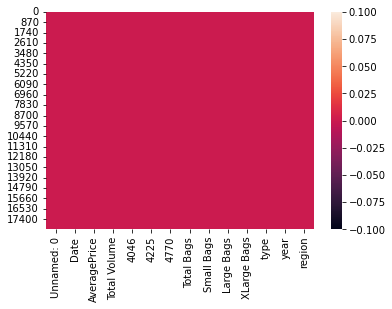

In [8]:
sns.heatmap(df.isnull())

In [9]:
#Let' drop the column which is not required for further analysis
df.drop(columns='Unnamed: 0', inplace =True) 

In [10]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [11]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

number of unique values present in our datasets

In [12]:
df['year'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

Better better visuliazation lets change the format of date column.

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df['month']=df['Date'].dt.month

In [14]:
df['year']=df['Date'].dt.year

In [15]:
df['Date']=df['month'].astype(str)+"-"+df['year'].astype(str)

In [16]:
df['Date']

0        12-2015
1        12-2015
2        12-2015
3        12-2015
4        11-2015
          ...   
18244     2-2018
18245     1-2018
18246     1-2018
18247     1-2018
18248     1-2018
Name: Date, Length: 18249, dtype: object

In [17]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,1-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,1-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,1-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


In [18]:
#dropping the column Date as it is not required for further analysis 
df.drop(columns='Date', inplace =True) 

# Encoding:

In [19]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

#data['type']=oe.fit_transform(data['type'].values.reshape(-1,1))
#we can perform the above step if we more than one type of avacado's in our data


df['type']=oe.fit_transform(df['type'].values.reshape(-1,1))
df['region']=oe.fit_transform(df['region'].values.reshape(-1,1))
df['year']=oe.fit_transform(df['year'].values.reshape(-1,1))

now data sets are all numeric format

# Let's do some Visualization:

<AxesSubplot:xlabel='AveragePrice', ylabel='count'>

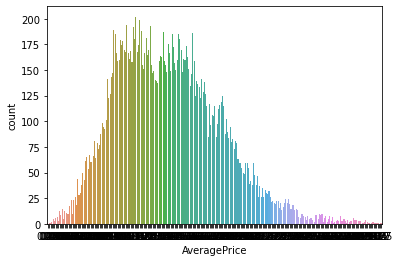

In [20]:
#Printing the AveragePrice with countplot

sns.countplot(data=df,x='AveragePrice')

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

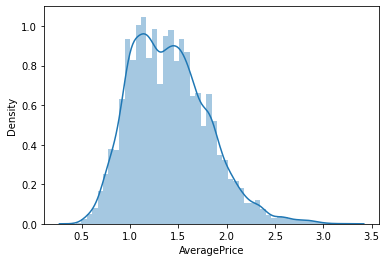

In [21]:
#It is quite normally distributed but not perfectly distributed we will solve it through skewness

sns.distplot(df['AveragePrice'])

<AxesSubplot:xlabel='AveragePrice'>

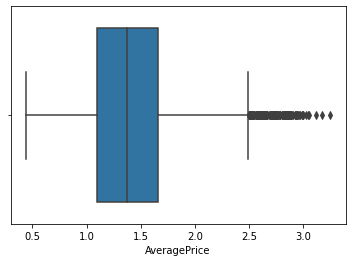

In [22]:
#Printing the column with boxplot & we can clearly see there are outlier in the column

sns.boxplot(data=df,x='AveragePrice')

<AxesSubplot:xlabel='AveragePrice'>

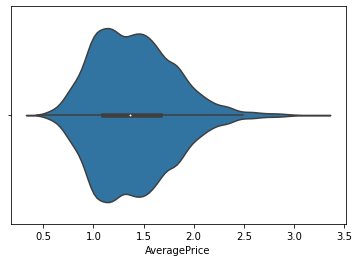

In [23]:
#We can clearly see that the plot is more concentrated towards 1.0 to 2.0

sns.violinplot(df['AveragePrice'])

<AxesSubplot:xlabel='AveragePrice', ylabel='Count'>

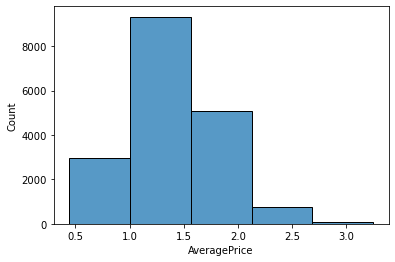

In [24]:
#From 1.0 to 1.5 it is on the highest on count

sns.histplot(df['AveragePrice'],bins=5)

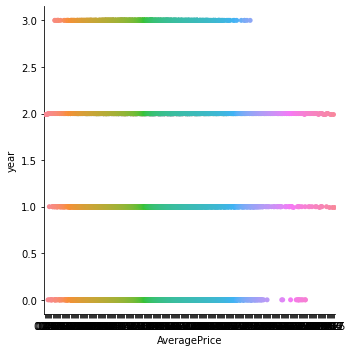

In [25]:
#Plotting catplot of AveragePrice & Year with the help of seaborn library
#We can see that their is increase in 2017 in the AveragePrice while comparing to 2018

sns.catplot(x='AveragePrice',y='year',data=df)

<AxesSubplot:xlabel='AveragePrice', ylabel='year'>

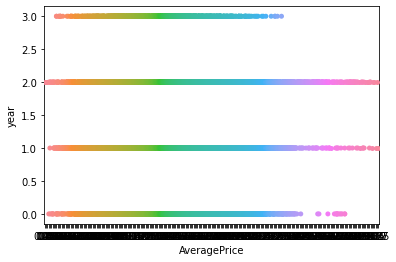

In [26]:
#Plotting it with stripplot

sns.stripplot(x='AveragePrice',y='year',data=df)

<AxesSubplot:xlabel='AveragePrice', ylabel='year'>

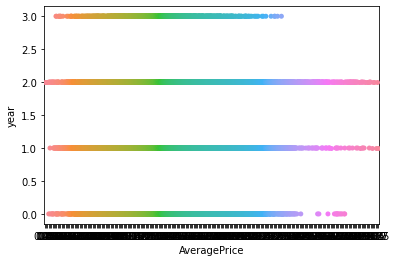

In [27]:
#Plotting swarmplot with AveargePrice & Year 

sns.swarmplot(x='AveragePrice',y='year',data=df)

<AxesSubplot:xlabel='AveragePrice', ylabel='year'>

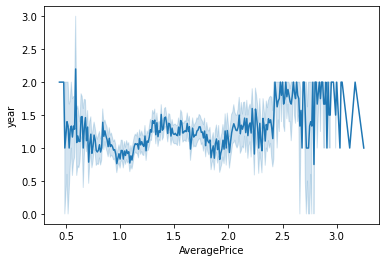

In [28]:
#Plotting lineplot with AveragePrice & Year 

sns.lineplot(x='AveragePrice',y='year',data=df)

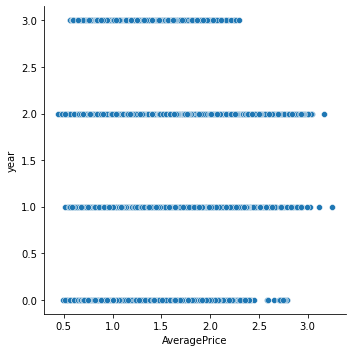

In [29]:
#Plotting relational plot with AveragePrice & Year

sns.relplot('AveragePrice','year',data=df)

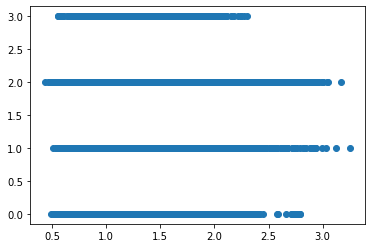

In [30]:
#Plotting the Scatter plot with aveargeprice & year

plt.scatter(df['AveragePrice'],df['year'])
plt.show()

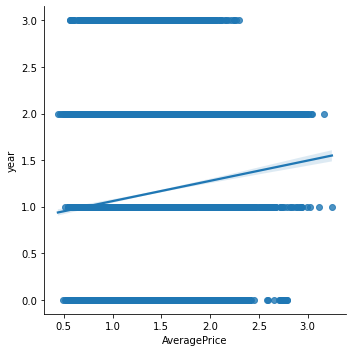

In [31]:
#Plotting lmplot with the variables AveragePrice & Year
#It shows the +ve relationship b/w them

sns.lmplot('AveragePrice','year',data=df)

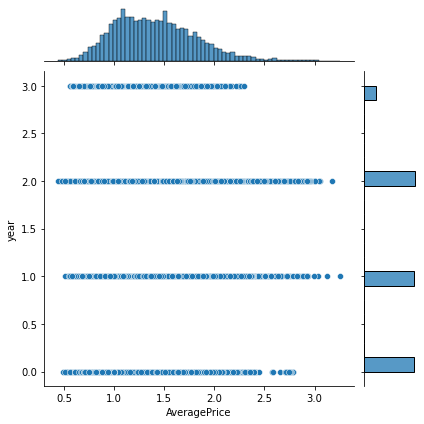

In [32]:
#Plotting jointplot of AveragePrice & Year

sns.jointplot(x=df['AveragePrice'],y=df['year'],data=df)

<AxesSubplot:xlabel='AveragePrice', ylabel='year'>

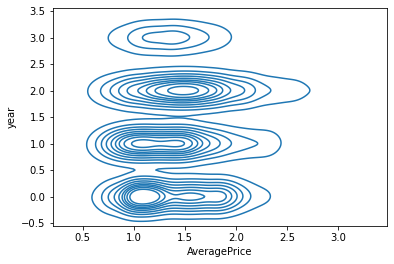

In [33]:
#Plotting kdeplot with AveragePrice & Year 

sns.kdeplot(x='AveragePrice',y='year',data=df)

<AxesSubplot:xlabel='AveragePrice', ylabel='year'>

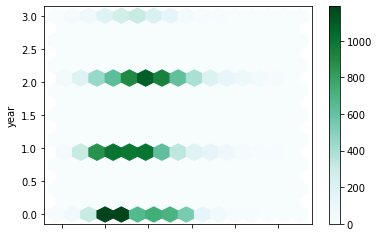

In [34]:
#Plotting the hexagonal shape with AveragePrice & Year

df.plot.hexbin(x='AveragePrice', y='year', gridsize=15)

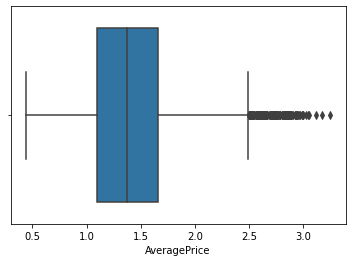

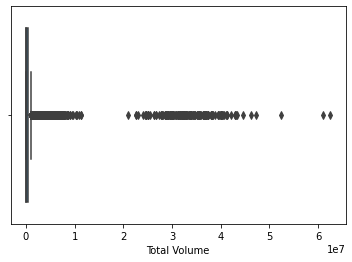

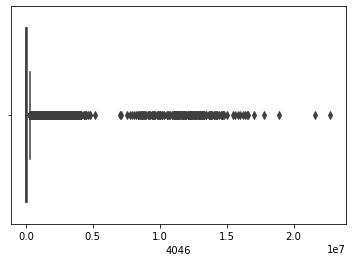

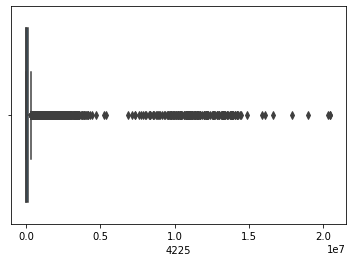

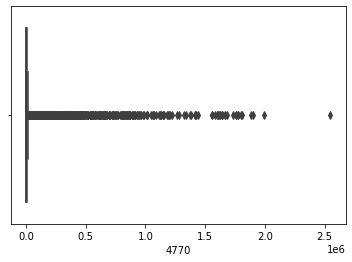

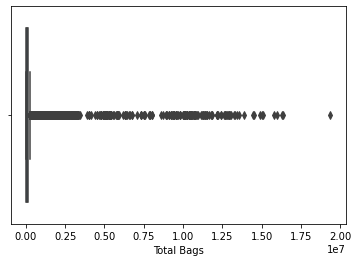

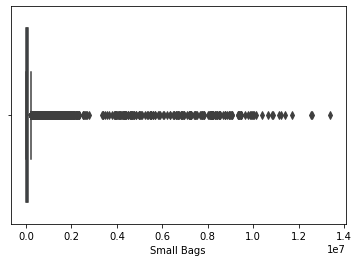

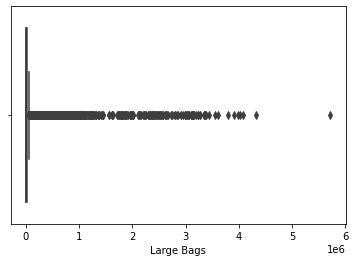

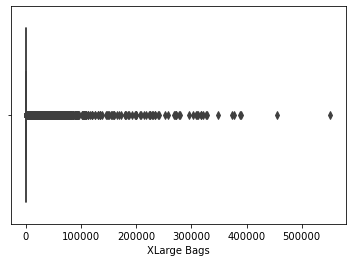

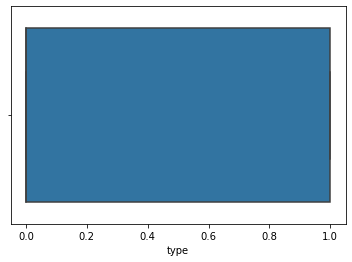

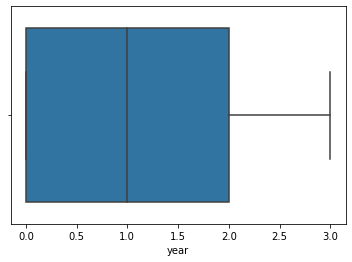

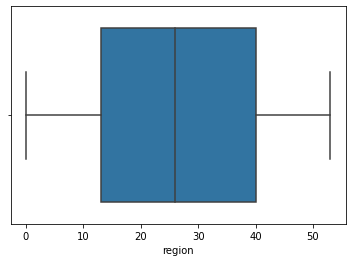

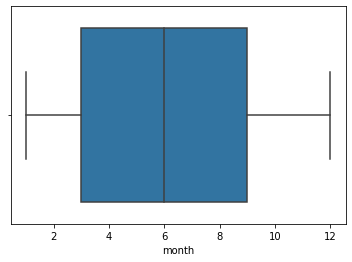

In [35]:
for i in df.columns:
    plt.figure()
    sns.boxplot(x=df[i])
    plt.show()

outliers are present in our data sets

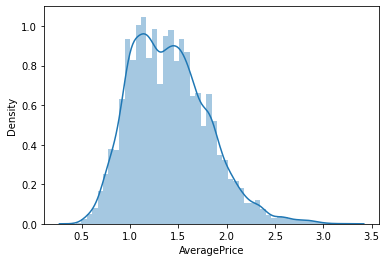

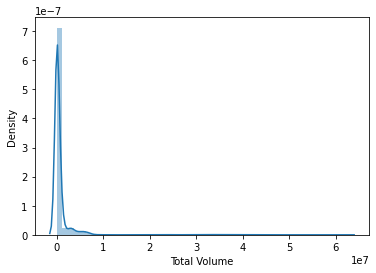

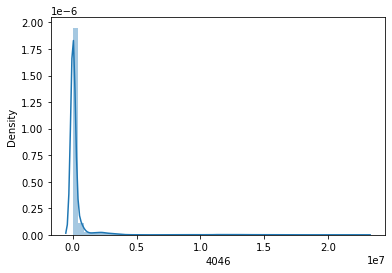

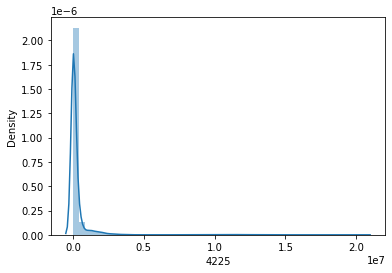

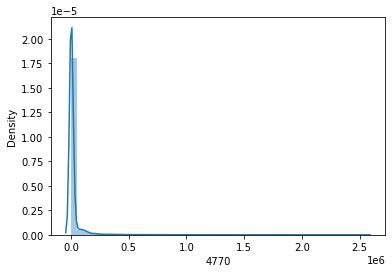

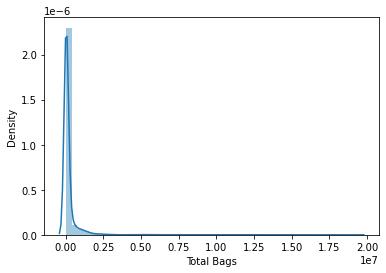

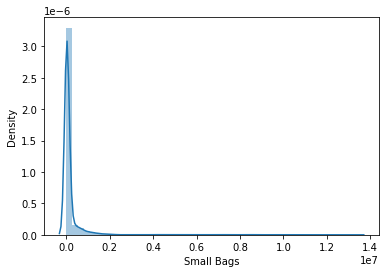

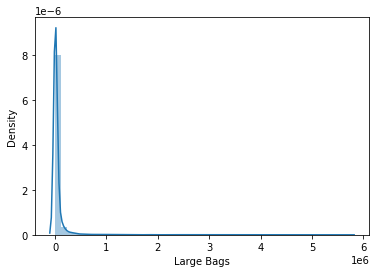

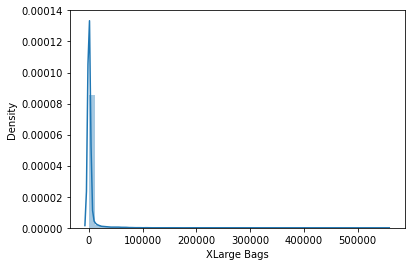

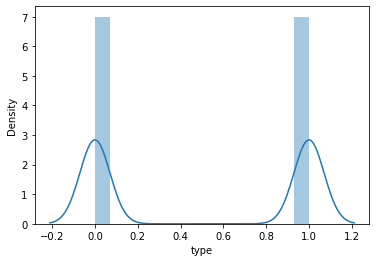

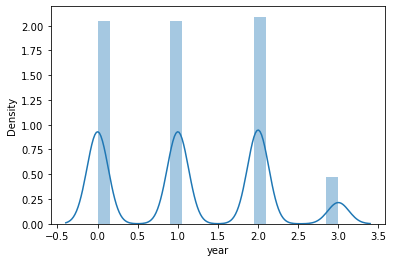

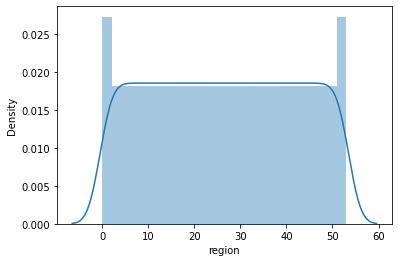

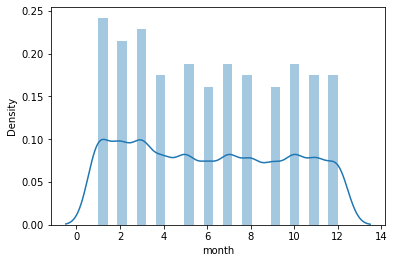

In [36]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])
    plt.show()

skewness has present in our datasets

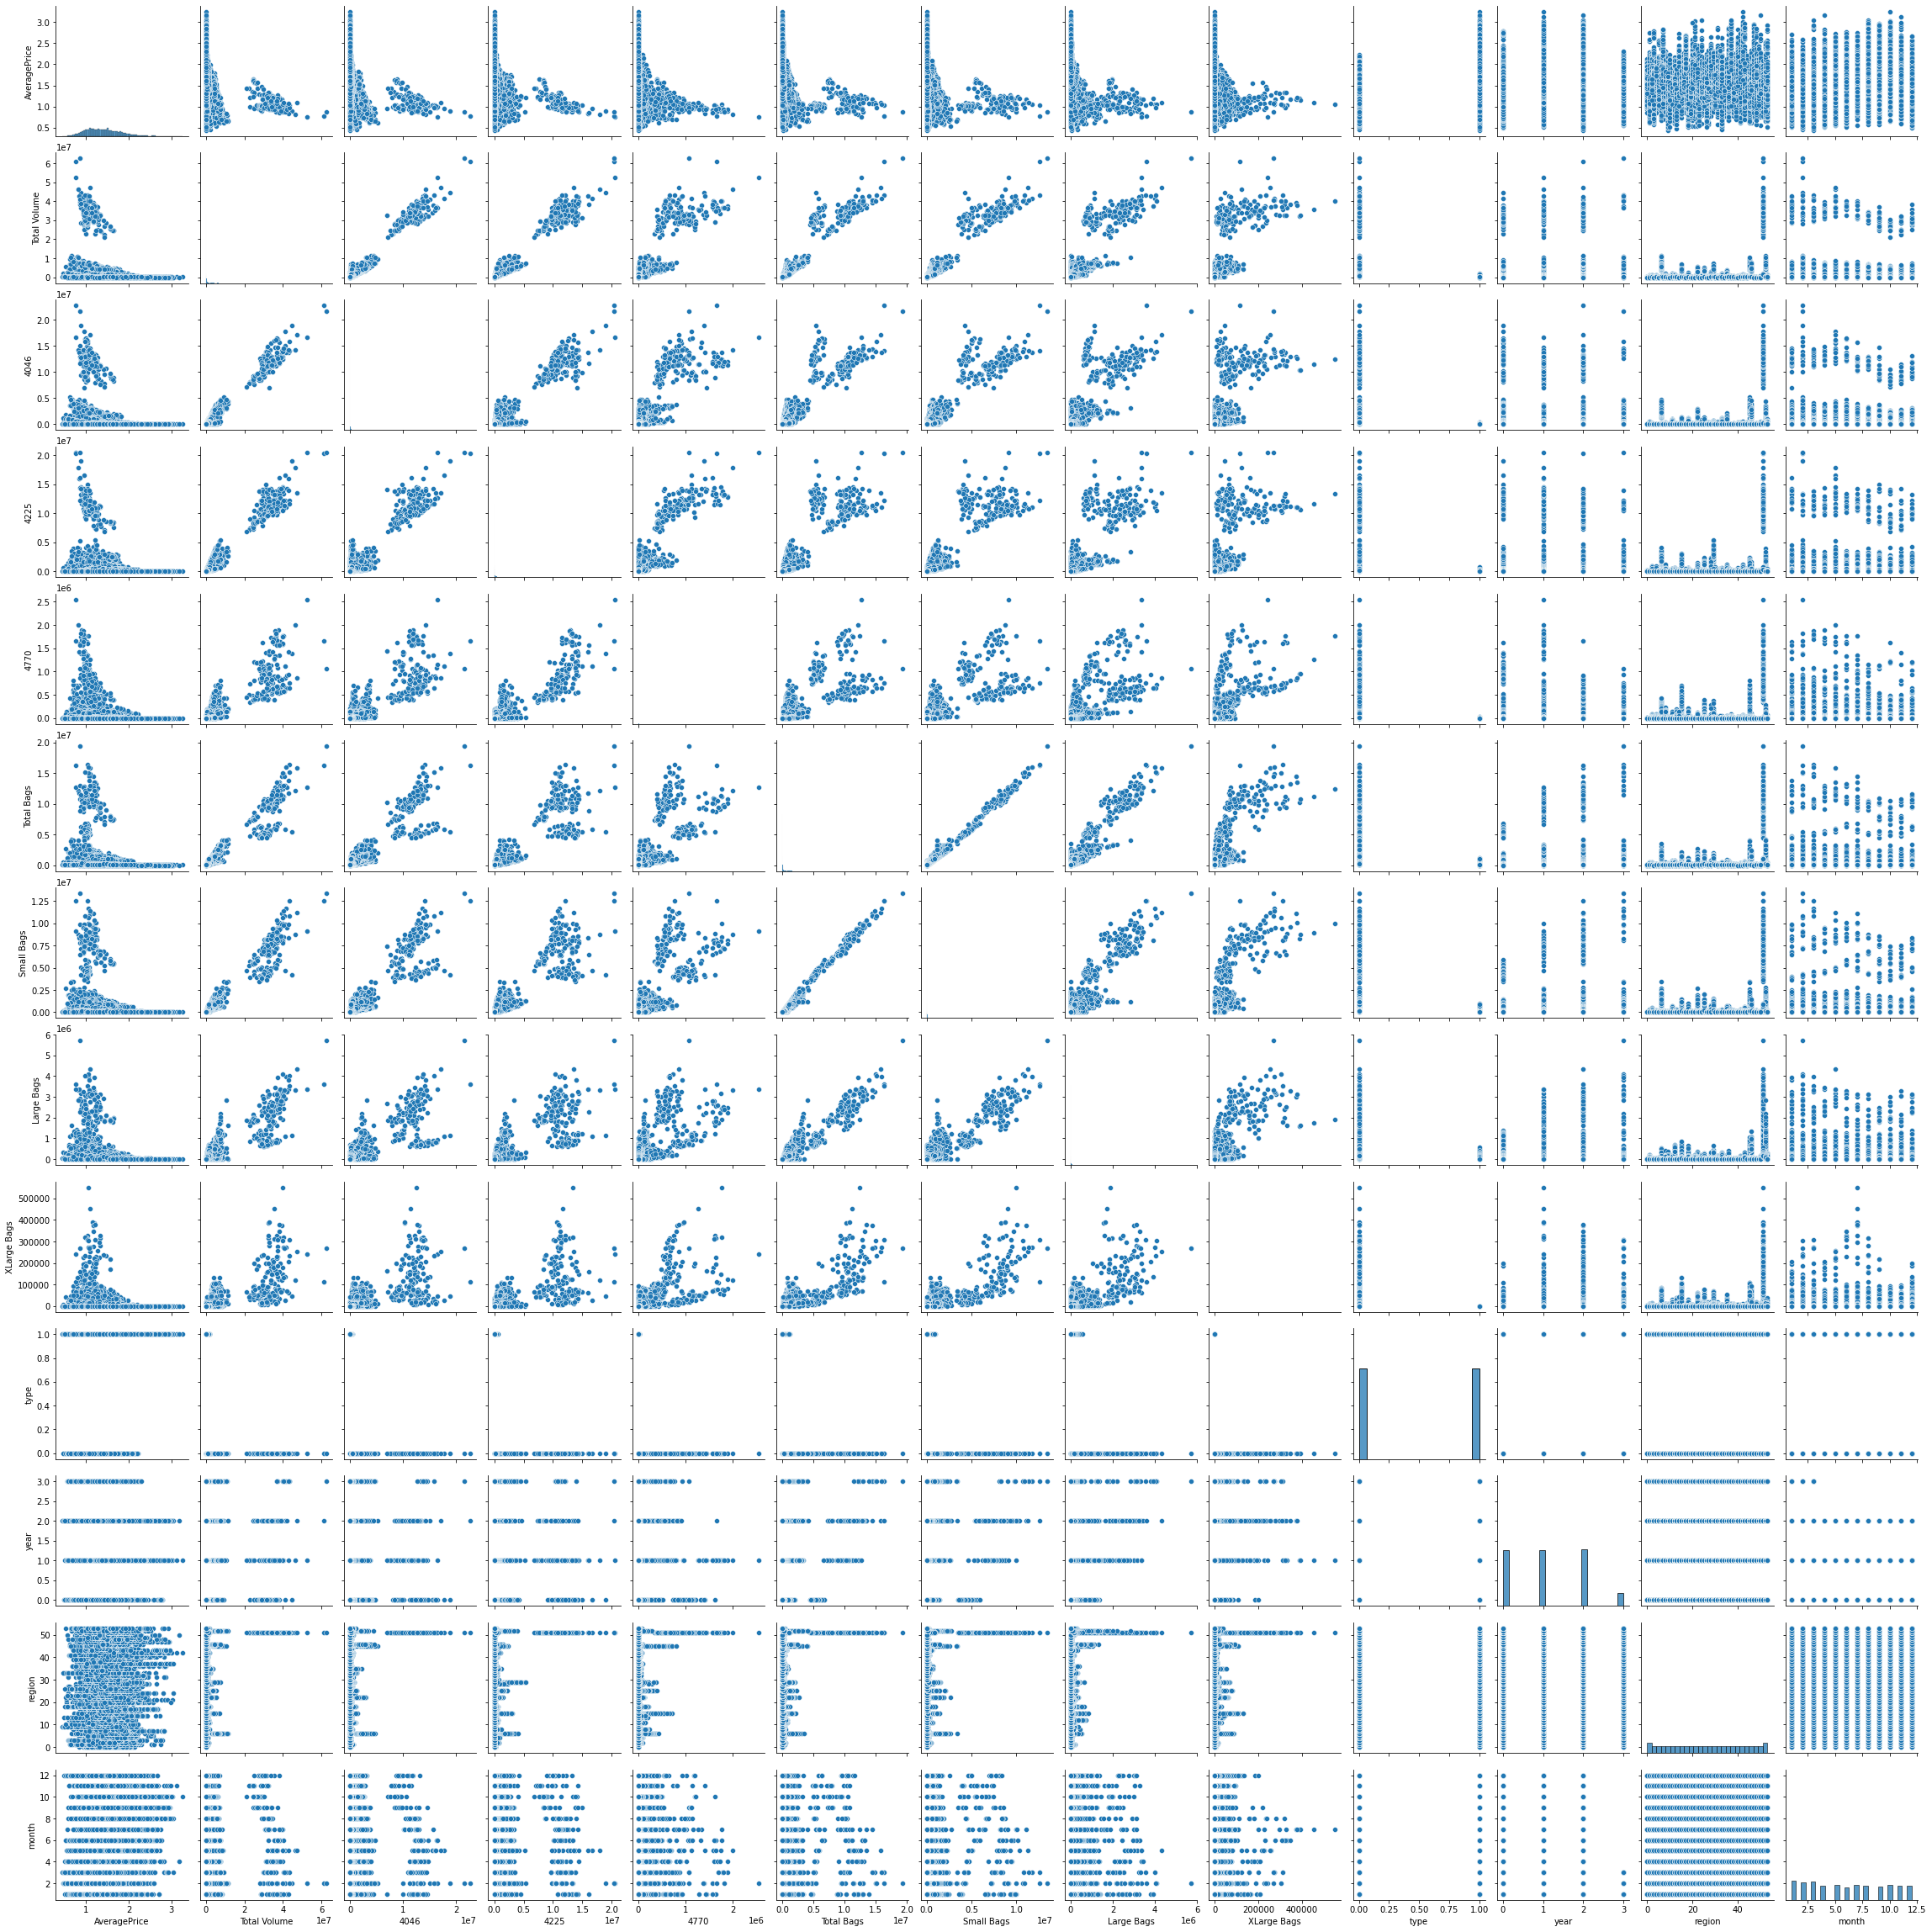

In [37]:
sns.pairplot(df)

here we can see that all dataset are lies in your nature

# describe the datasets:

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
type,18249.0,0.499918,5.000137e-01,0.00,0.00,0.00,1.00,1.00


there is a large difference between 75% and maximum for maximum columns.so outliers are present in this dataset.lets see its with visualization.

<AxesSubplot:>

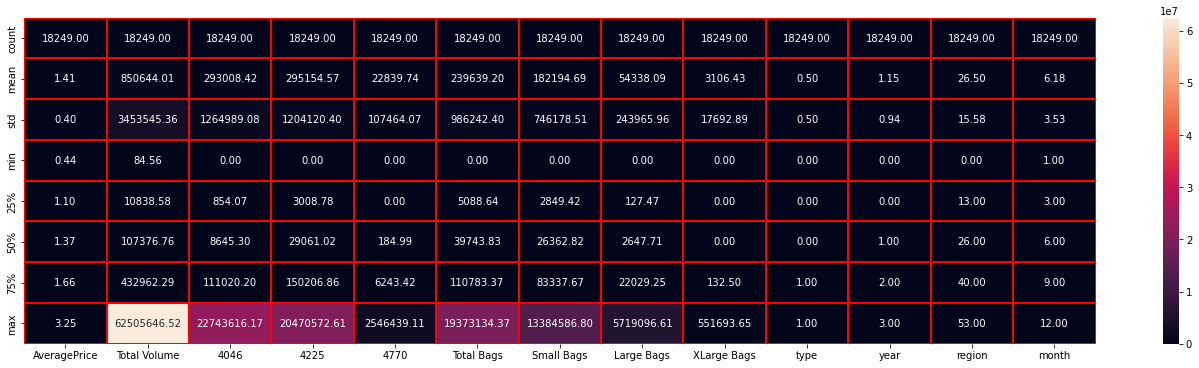

In [39]:
plt.figure(figsize=(24,6))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="red",fmt="0.2f")

# Correlation of the columns with target columns:

In [40]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.162409
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176,-0.024689
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073,-0.025803
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.022108
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.033424
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256,-0.022724
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,-0.023126
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.020187
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,-0.012969
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280,-0.000085


above figure is the correlation with each other . Lets see its with visualization

<AxesSubplot:>

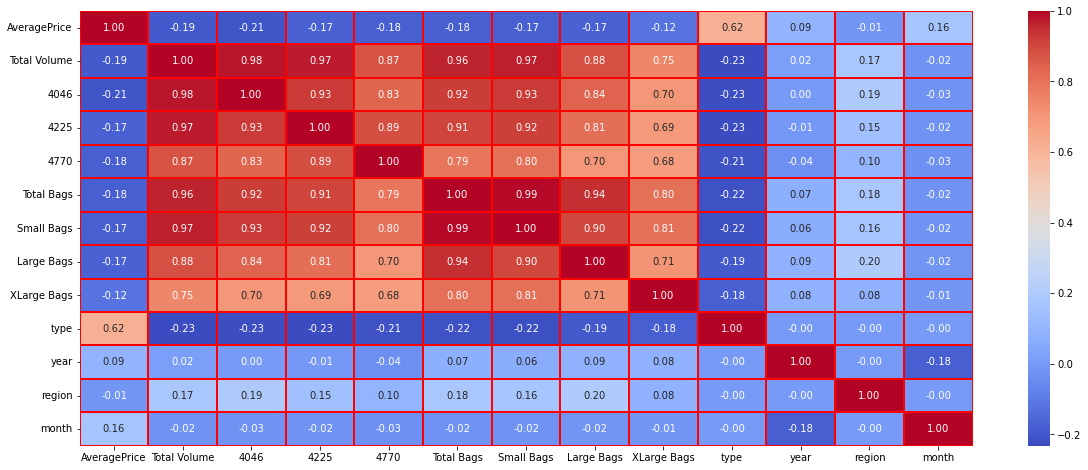

In [41]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="red",fmt="0.2f",cmap="coolwarm")

Checking the columns which are positively and negative correlated with the target columns:

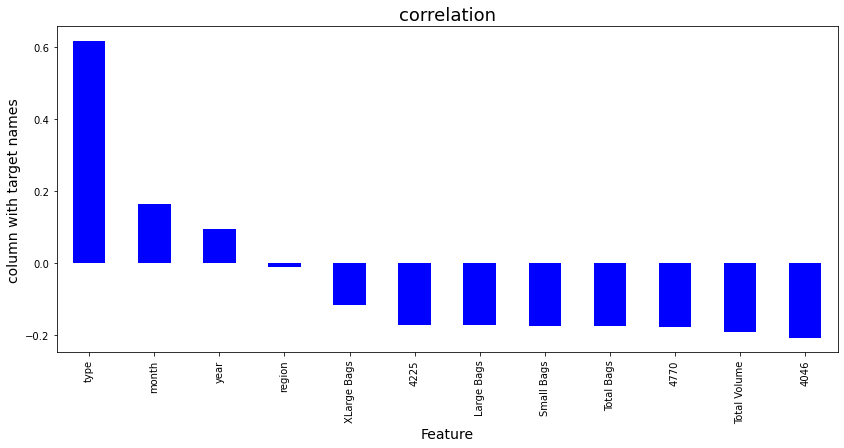

In [42]:
plt.figure(figsize=(14,6))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

maximum columns are negative correlation with the target columns

In [43]:
#Droping some more columns that we don't need

df.drop(['4046','4225','4770','Small Bags','Large Bags','XLarge Bags'],axis=1,inplace=True)

# outliers and Skewness removal:

In [44]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 2652,  2652,  2653,  2653,  2654,  2654,  2655,  2655,  2656,
         2656,  2657,  2657,  2658,  2658,  2659,  2659,  2660,  2660,
         2661,  2661,  2662,  2662,  2663,  2663,  2664,  2664,  2665,
         2665,  2666,  2666,  2667,  2667,  2668,  2668,  2669,  2669,
         2670,  2670,  2671,  2671,  2672,  2672,  2673,  2673,  2674,
         2674,  2675,  2675,  2676,  2676,  2677,  2677,  2678,  2678,
         2679,  2679,  2680,  2680,  2681,  2681,  2682,  2682,  2683,
         2683,  2684,  2684,  2685,  2685,  2686,  2686,  2687,  2687,
         2688,  2688,  2689,  2689,  2690,  2690,  2691,  2691,  2692,
         2692,  2693,  2693,  2694,  2694,  2695,  2695,  2696,  2696,
         2697,  2697,  2698,  2698,  2699,  2699,  2700,  2700,  2701,
         2701,  2702,  2702,  2703,  2703,  5460,  5460,  5461,  5461,
         5462,  5462,  5463,  5463,  5464,  5464,  5465,  5465,  5466,
         5466,  5467,  5467,  5468,  5468,  5469,  5469,  5470,  5470,
      

In [45]:
df_new=df[(z<3).all(axis=1)]
df_new

,AveragePrice,Total Volume,Total Bags,type,year,region,month
0,1.33,64236.62,8696.87,0.0,0.0,0.0,12
1,1.35,54876.98,9505.56,0.0,0.0,0.0,12
2,0.93,118220.22,8145.35,0.0,0.0,0.0,12
3,1.08,78992.15,5811.16,0.0,0.0,0.0,12
4,1.28,51039.60,6183.95,0.0,0.0,0.0,11
...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,1.0,3.0,53.0,2
18245,1.71,13888.04,9264.84,1.0,3.0,53.0,1
18246,1.87,13766.76,9394.11,1.0,3.0,53.0,1
18247,1.93,16205.22,10969.54,1.0,3.0,53.0,1


now remove all outliers

In [46]:
df_new.shape

(17931, 7)

In [47]:
df.shape

(18249, 7)

In [48]:
data_loss=((18249-17931)/18249)*100
data_loss

1.7425612362321221

1.74 percentage data loss for removing outliers

In [49]:
x=df_new.drop("AveragePrice",axis=1)
y=df_new["AveragePrice"]
print(x.shape)
print(y.shape)

(17931, 6)
(17931,)


In [50]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [51]:
df_new.skew()

Total Volume   -0.004068
Total Bags     -0.017050
type           -0.005912
year           -0.089245
region         -0.256510
month          -0.144323
dtype: float64

All the values of skewness are in range of -0.5 to +0.5.so finally skewness has been remove successfully

# Let's perform Scaling:

In [52]:
LL

array([[-0.09695407, -0.54651306, -1.00296016, -1.30453265, -2.01375561,
         1.49406475],
       [-0.16765592, -0.50780955, -1.00296016, -1.30453265, -2.01375561,
         1.49406475],
       [ 0.17750877, -0.57490402, -1.00296016, -1.30453265, -2.01375561,
         1.49406475],
       ...,
       [-0.78572754, -0.5129549 ,  0.99704858,  1.70058137,  1.56747464,
        -1.6407281 ],
       [-0.71309734, -0.4450338 ,  0.99704858,  1.70058137,  1.56747464,
        -1.6407281 ],
       [-0.67910401, -0.40489835,  0.99704858,  1.70058137,  1.56747464,
        -1.6407281 ]])

In [53]:
x=df_new  #now new data is convert to x

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [55]:
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best accuracy is ",maxAcc, " at Random State ",maxRS)

Best accuracy is  0.5001331209179911  at Random State  188


In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=maxRS)

In [57]:
model=[DecisionTreeRegressor(),LinearRegression(),RandomForestRegressor(),AdaBoostRegressor(),Lasso(alpha=0.0001)]
for m in model:
    m.fit(x_train,y_train)
    #sc=m.score(x_train,y_train)
    predm=m.predict(x_test)
    acc=r2_score(y_test,predm)
    print('Accuracy Score of',m,'is:',acc)
    print('mean_absolute_error:',mean_absolute_error(y_test,predm))
    print('mean_squared_error:',mean_squared_error(y_test,predm))
    print('Root mean_squared_error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("\n")

Accuracy Score of DecisionTreeRegressor() is: 0.7816965722820225
mean_absolute_error: 0.11489824365765262
mean_squared_error: 0.03278026205742961
Root mean_squared_error: 0.1810532022843827


Accuracy Score of LinearRegression() is: 0.5001331209179911
mean_absolute_error: 0.2155338259144659
mean_squared_error: 0.07505959691712316
Root mean_squared_error: 0.27397006573186633


Accuracy Score of RandomForestRegressor() is: 0.8935702776924597
mean_absolute_error: 0.08768157234457759
mean_squared_error: 0.015981399029829934
Root mean_squared_error: 0.12641755823393336


Accuracy Score of AdaBoostRegressor() is: 0.5323557872196591
mean_absolute_error: 0.2103700607356842
mean_squared_error: 0.07022106800990711
Root mean_squared_error: 0.2649925810469175


Accuracy Score of Lasso(alpha=0.0001) is: 0.5000935510293828
mean_absolute_error: 0.2155451163095689
mean_squared_error: 0.07506553869885205
Root mean_squared_error: 0.27398090936934283




Let's check cross validation 

# Cross Validation Model:

In [58]:
model=[DecisionTreeRegressor(),LinearRegression(),RandomForestRegressor(),AdaBoostRegressor(),Lasso(alpha=0.0001)]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print("Score for",m,"is: ",score.mean())

Score for DecisionTreeRegressor() is:  -0.28277912131644933
Score for LinearRegression() is:  0.10804966598539537
Score for RandomForestRegressor() is:  0.0928418789307996
Score for AdaBoostRegressor() is:  -0.05016932590428669
Score for Lasso(alpha=0.0001) is:  0.10830259414500394


With LinearRegression model there is very less difference in accuracy and cross validation score, Hence the best model is LinearRegression.

# Hyper Parameter Training:

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
parameters={"fit_intercept":["True","False"],
           "positive":["True","False"],
           "copy_X":["True","False"],
           "n_jobs":[1,2,3]}

In [61]:
GCV=GridSearchCV(LinearRegression(),parameters,cv=5)

In [62]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': ['True', 'False'],
                         'fit_intercept': ['True', 'False'],
                         'n_jobs': [1, 2, 3], 'positive': ['True', 'False']})

In [63]:
GCV.best_params_

{'copy_X': 'True', 'fit_intercept': 'True', 'n_jobs': 1, 'positive': 'True'}

In [64]:
Final_mod= LinearRegression(copy_X="True",fit_intercept="True",n_jobs=1,positive="True")
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
r2=r2_score(y_test,pred)
print(r2*100)

43.93273263907646


After performing GridSearchCV method accuarcy is 43.93%

# saving the best model:

In [65]:
import pickle
filename= 'avacado_regression_model_pred.pkl'
pickle.dump(Final_mod, open(filename, 'wb'))

# Conclusion:

In [66]:
#load the model from the disk

loaded_model = pickle.load(open('avacado_regression_model_pred.pkl', 'rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.43932732639076466


In [67]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=["Predicted","Orginal"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,3577,3578,3579,3580,3581,3582,3583,3584,3585,3586
Predicted,1.600152,1.598267,1.522596,1.690419,1.17509,1.542192,1.0427,1.045567,1.087167,1.285806,...,1.179843,1.161743,1.690419,1.221442,1.564195,1.542192,1.522596,1.150097,1.627125,1.747722
Orginal,1.600152,1.598267,1.522596,1.690419,1.17509,1.542192,1.0427,1.045567,1.087167,1.285806,...,1.179843,1.161743,1.690419,1.221442,1.564195,1.542192,1.522596,1.150097,1.627125,1.747722


In [68]:
#end

# Classification Problem:

In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("avocado.csv")
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


loaded top 10 datasets

In [3]:
df.tail(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18239,2,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,2018,WestTexNewMexico
18240,3,2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018,WestTexNewMexico
18241,4,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico
18242,5,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico
18243,6,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


load last 10 datasets

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

above is the list of all columns

In [5]:
df.shape

(18249, 14)

we have 18249 rows and 14 columns in our datasets

In [6]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

some columns are object type and somes columns are numerical data type

In [7]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

data does not contain any missing values. lets see its with visualization.

<AxesSubplot:>

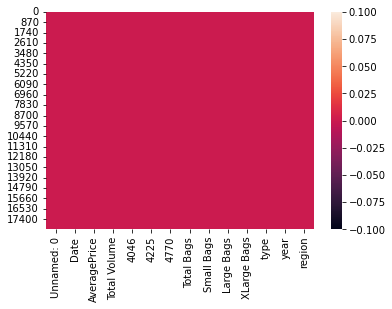

In [8]:
sns.heatmap(df.isnull())

In [9]:
#Let' drop the column which is not required for further analysis
df.drop(columns='Unnamed: 0', inplace =True) 

In [10]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [11]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

no of unique value present in our target columns(region)

In [12]:
df['year'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

Better better visuliazation lets change the format of date column.

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df['month']=df['Date'].dt.month

In [14]:
df['year']=df['Date'].dt.year

In [15]:
df['Date']=df['month'].astype(str)+"-"+df['year'].astype(str)

In [16]:
df["Date"]

0        12-2015
1        12-2015
2        12-2015
3        12-2015
4        11-2015
          ...   
18244     2-2018
18245     1-2018
18246     1-2018
18247     1-2018
18248     1-2018
Name: Date, Length: 18249, dtype: object

In [17]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,1-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,1-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,1-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


In [18]:
#dropping the column Date as it is not required for further analysis 
df.drop(columns='Date', inplace =True)

# Let's do Visualization:

In [19]:
nom_col=[]
for i in df:
    if df.dtypes[i] == object:
        nom_col.append(i)
        
print(nom_col)

['type', 'region']


Above is the list of columns which has datatype as object.

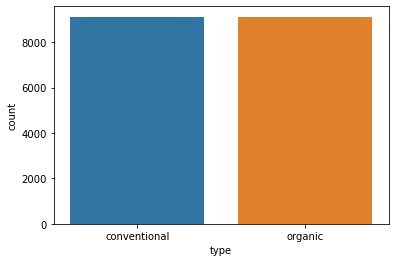

In [20]:
plt.figure()
sns.countplot(df["type"])
plt.show()

above figure is almost same as conventional and organic types

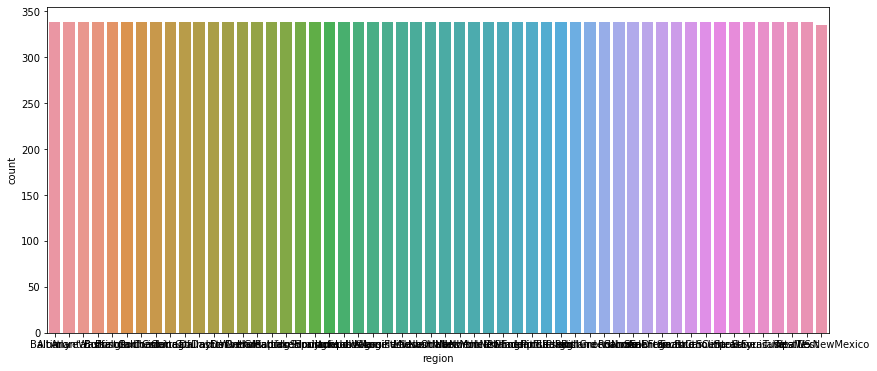

In [21]:
plt.figure(figsize=(14,6))
sns.countplot(df["region"])
plt.show()

list of all regions are same . so no need to apply imbalace technique

<AxesSubplot:xlabel='AveragePrice'>

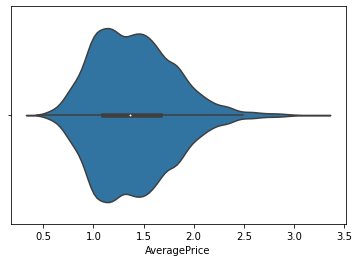

In [22]:
#We can clearly see that the plot is more concentrated towards 1.0 to 2.0

sns.violinplot(df['AveragePrice'])

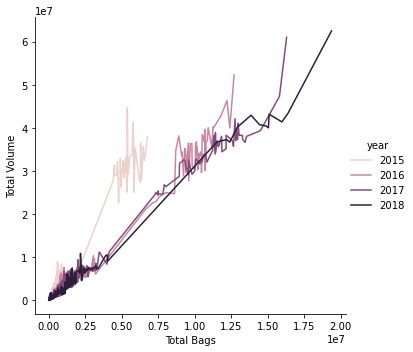

In [23]:
#comparison betwwen total bags vs total volumns
sns.relplot(x='Total Bags',y='Total Volume',hue='year',data=df,kind='line')

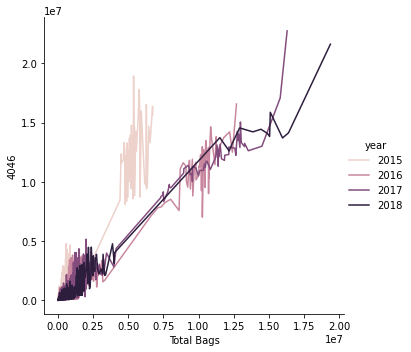

In [24]:
#comparison betwwen total bags vs 4046
sns.relplot(x='Total Bags',y='4046',hue='year',data=df,kind='line')

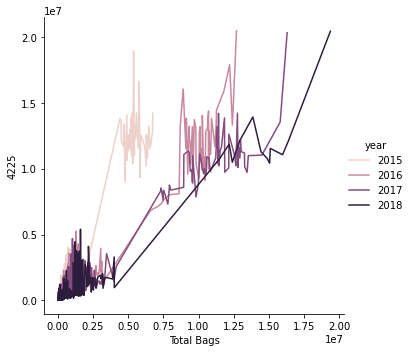

In [25]:
#comparison betwwen total bags vs 4225
sns.relplot(x='Total Bags',y='4225',hue='year',data=df,kind='line')

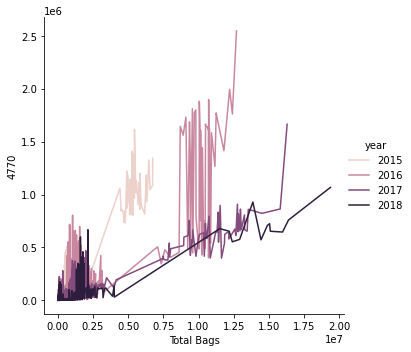

In [26]:
#comparison betwwen total bags vs 4770
sns.relplot(x='Total Bags',y='4770',hue='year',data=df,kind='line')

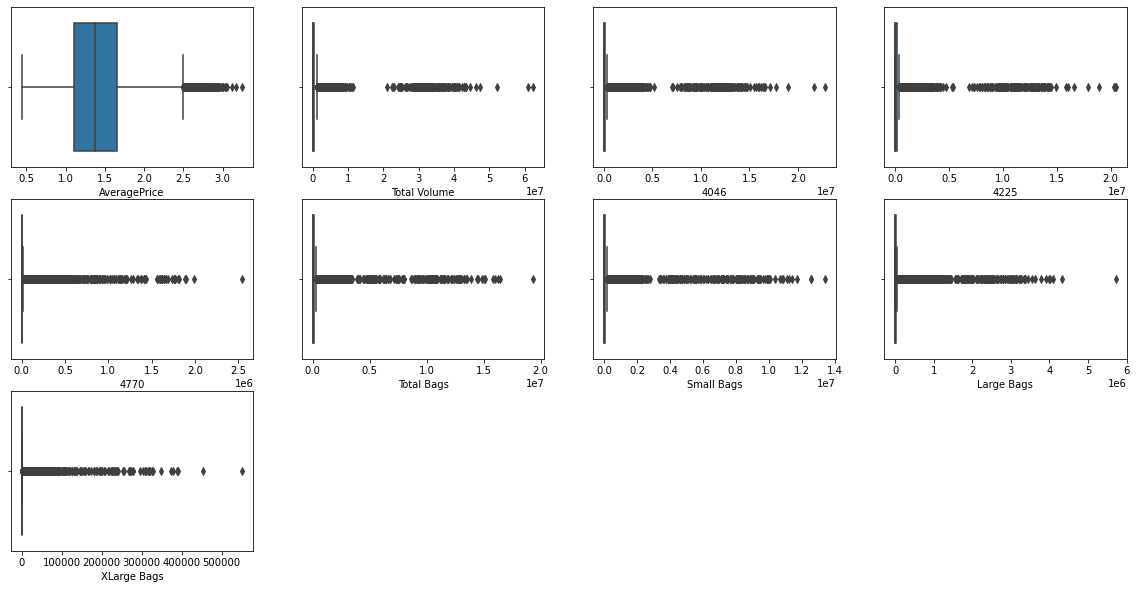

In [27]:
plt.figure(figsize=(20,10))
for i in range(len(df.columns)):
    if df.dtypes[i]=='float64':
        plt.subplot(3,4,i+1)
        sns.boxplot(df[df.columns[i]], orient="v")


outliers present in our datasets

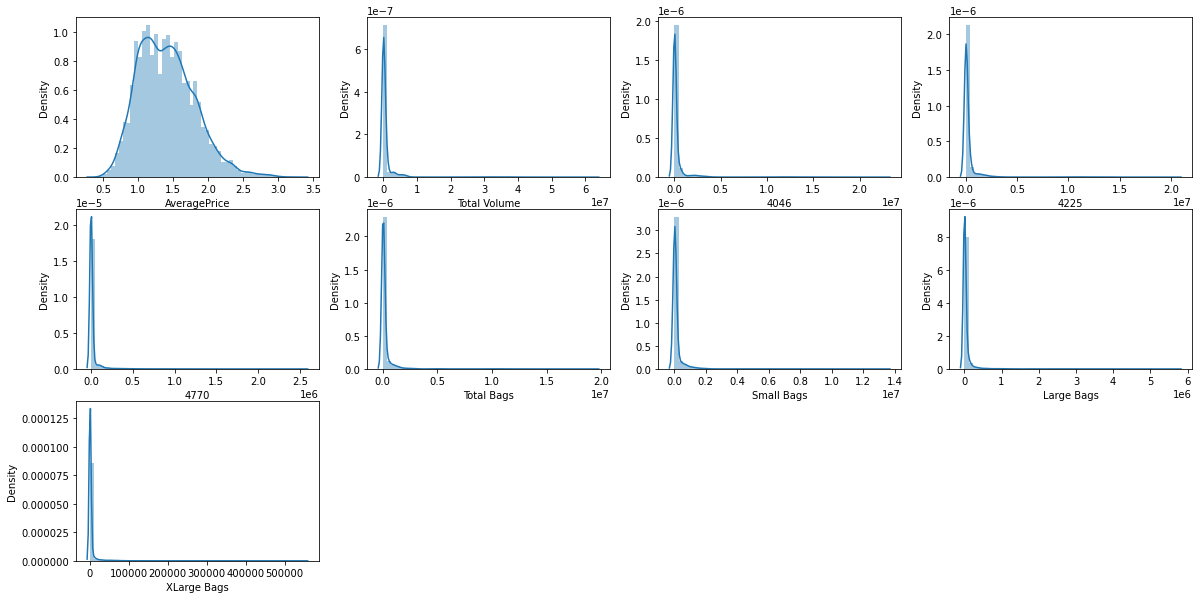

In [28]:
plt.figure(figsize=(20,10))
for i in range(len(df.columns)):
    if df.dtypes[i]=='float64':
        plt.subplot(3,4,i+1)
        sns.distplot(df[df.columns[i]])

maximun columns are present in skewness

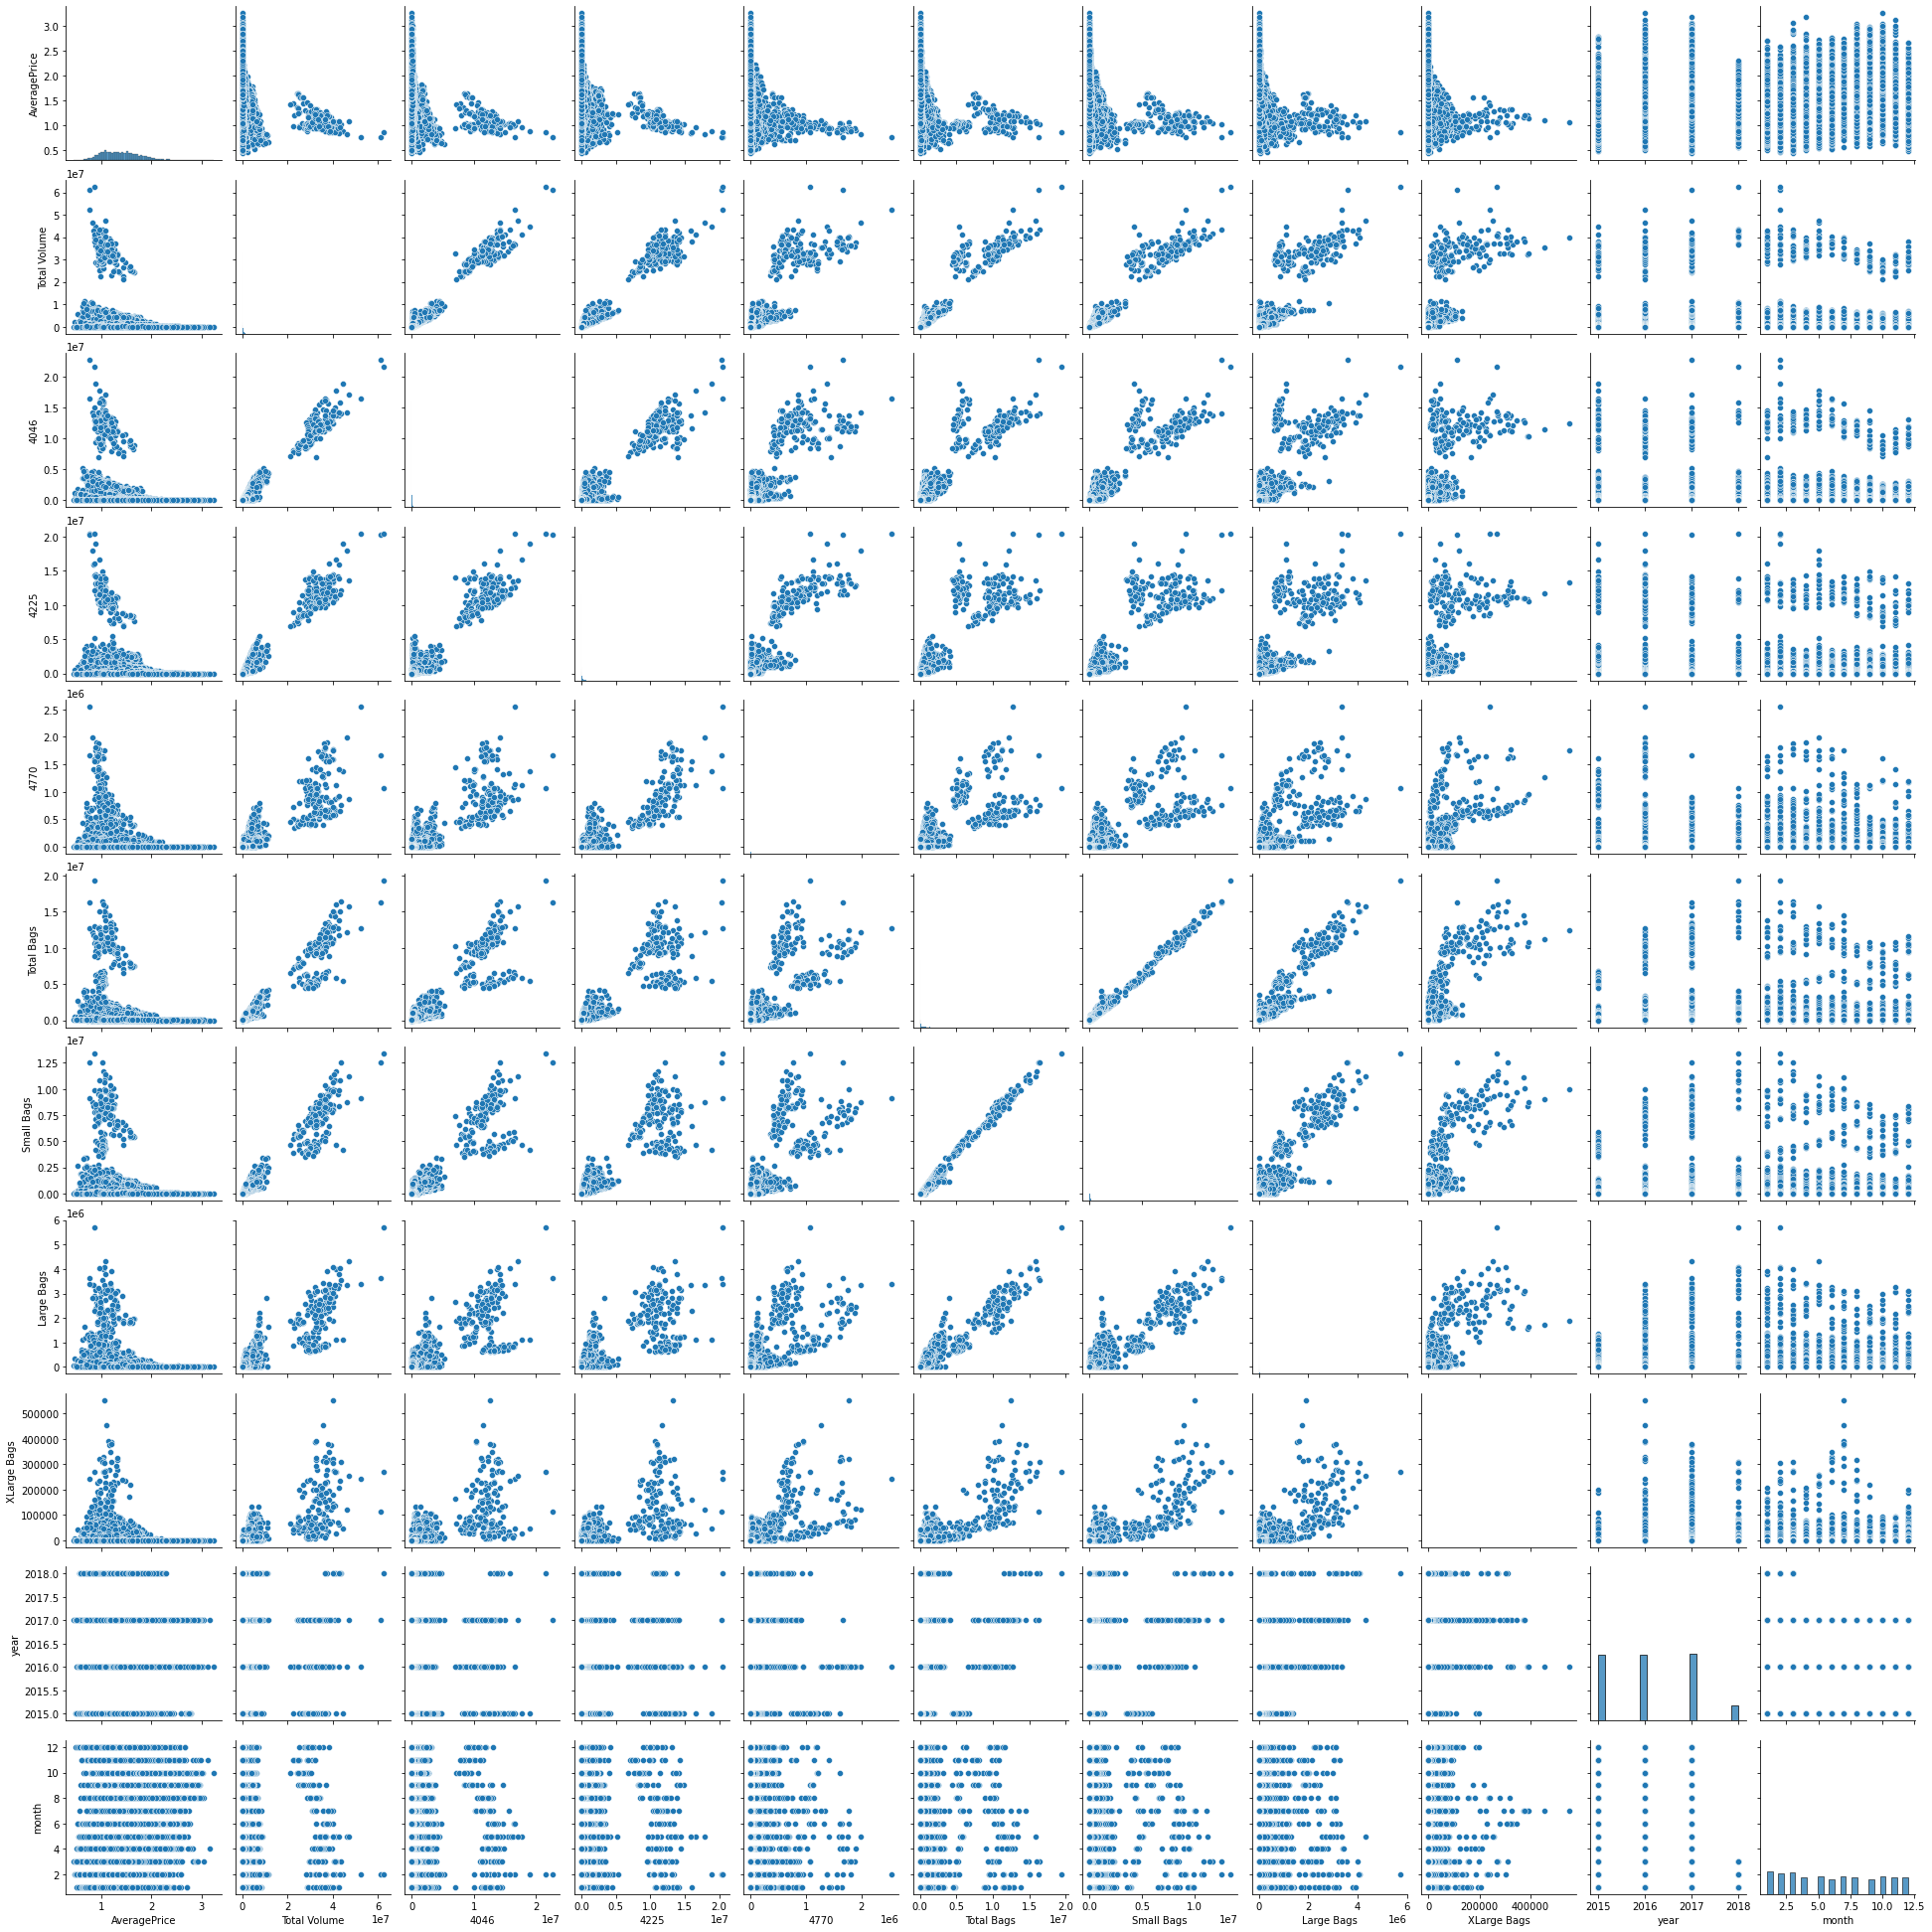

In [29]:
sns.pairplot(df)

we can see that,all datas lies between in your nature

# Encoding:

In [30]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

#data['type']=oe.fit_transform(data['type'].values.reshape(-1,1))
#we can perform the above step if we more than one type of avacado's in our data


df['type']=oe.fit_transform(df['type'].values.reshape(-1,1))
df['region']=oe.fit_transform(df['region'].values.reshape(-1,1))
df['year']=oe.fit_transform(df['year'].values.reshape(-1,1))

now we have not any categorical types in our data sets

# describe the datasets:

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
type,18249.0,0.499918,5.000137e-01,0.00,0.00,0.00,1.00,1.00


there is a large difference between 75% and maximum for maximum columns.so outliers are present in this dataset.lets see its with visualization.

<AxesSubplot:>

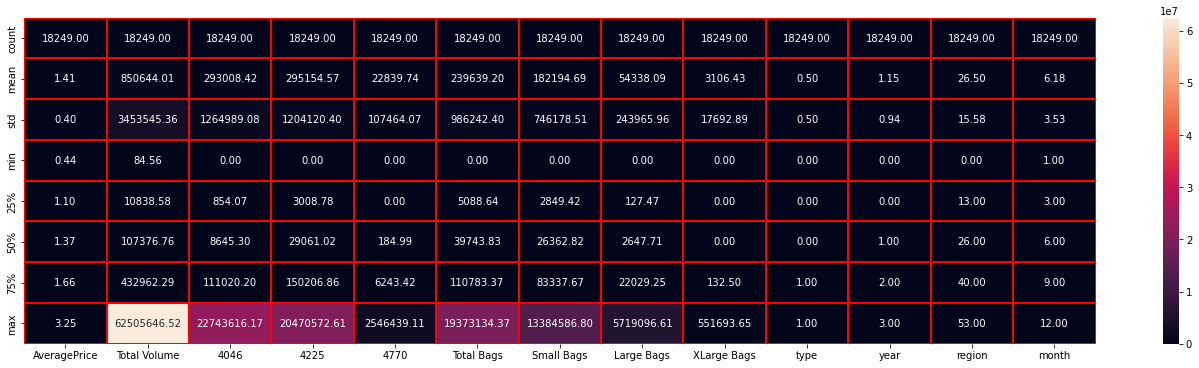

In [32]:
plt.figure(figsize=(24,6))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="red",fmt="0.2f")

# Correlation of the columns with target columns:

In [33]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.162409
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176,-0.024689
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073,-0.025803
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.022108
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.033424
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256,-0.022724
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,-0.023126
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.020187
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,-0.012969
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280,-0.000085


above figure is the correlation with each other . Lets see its with visualization

<AxesSubplot:>

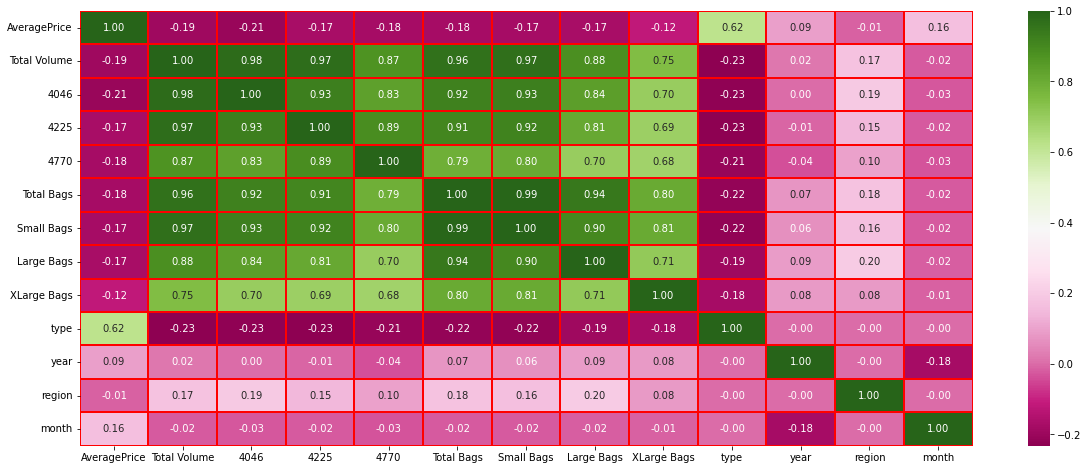

In [34]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="red",fmt="0.2f",cmap="PiYG")

Checking the columns which are positively and negative correlated with the target columns:

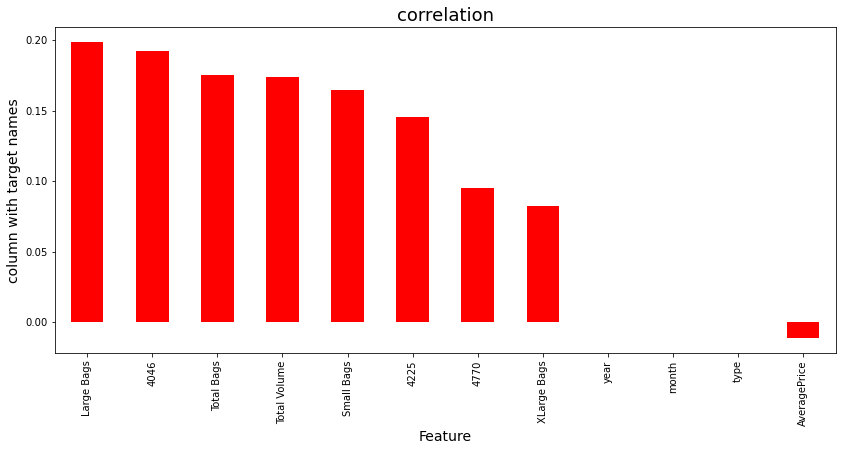

In [35]:
plt.figure(figsize=(14,6))
df.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

above fig we can see that, year,month no correlation with each othe so we drop this columns

In [36]:
# drop column 'year' and 'month'
df.drop(['year','month'],axis=1,inplace=True)

# outliers and Skewness removal:

In [37]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([2, 2, 8, ..., 0, 0, 0], dtype=int64))

In [38]:
df_new=df[(z<3).all(axis=1)]
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,53.0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,53.0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,53.0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,53.0


now remove all outliers

In [39]:
df_new.shape

(17651, 11)

In [40]:
df.shape

(18249, 11)

In [41]:
loss_percentage=((18249-17651)/18249)*100
loss_percentage

3.276891884486821

we have 3.27 percentage data loss for removing outliers

In [42]:
x=df_new.drop("region",axis=1)
y=df_new["region"]
print(x.shape)
print(y.shape)

(17651, 10)
(17651,)


separating x columns and y columns

In [43]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)


In [44]:
df_new.skew()

AveragePrice    0.000464
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
type           -0.037741
dtype: float64

Keeping +/-0.5 as the range for skewness.now skewness allmost remove

# Let's perform Scaling:

In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(df_new)

array([[-0.11782446, -0.07532391, -0.65742071, ..., -0.78115255,
        -0.67791909, -1.01904715],
       [-0.06432986, -0.14749743, -0.77717852, ..., -0.77119787,
        -0.67791909, -1.01904715],
       [-1.29886469,  0.20555557, -0.7317763 , ..., -0.75852256,
        -0.67791909, -1.01904715],
       ...,
       [ 1.18432357, -0.77527398, -0.61796649, ..., -0.950743  ,
        -0.67791909,  0.98130886],
       [ 1.31329624, -0.70179733, -0.54701087, ..., -0.91606805,
        -0.67791909,  0.98130886],
       [ 0.61561867, -0.66738095, -0.35967077, ..., -1.04811619,
        -0.67791909,  0.98130886]])

In [46]:
x=df_new

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [48]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    DTC=DecisionTreeClassifier()
    DTC.fit(x_train,y_train)
    pred=DTC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, " on Random State ",maxRS)

Best accuracy is  0.8028887000849617  on Random State  82


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=maxRS)

In [50]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),RandomForestClassifier()]

for m in model:
    m.fit(x_train,y_train)
    #m.score(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('Accuracy Score of',m,'is:', acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('\n')

Accuracy Score of DecisionTreeClassifier() is: 0.8043047295383744
[[54  0  0 ...  0  0  0]
 [ 0 45  0 ...  0  0  1]
 [ 0  0 58 ...  0  0  0]
 ...
 [ 0  0  0 ... 32  0  0]
 [ 0  1  0 ...  0 45  0]
 [ 0  1  1 ...  0  0 41]]
              precision    recall  f1-score   support

         0.0       0.72      0.83      0.77        65
         1.0       0.65      0.69      0.67        65
         2.0       0.88      0.87      0.87        67
         3.0       0.75      0.77      0.76        56
         4.0       0.78      0.87      0.82        67
         5.0       0.74      0.76      0.75        71
         6.0       0.94      0.95      0.95        66
         7.0       0.89      0.84      0.87        69
         8.0       0.90      0.88      0.89        65
         9.0       0.81      0.80      0.81        65
        10.0       0.81      0.79      0.80        76
        11.0       0.92      0.88      0.90        78
        12.0       0.80      0.86      0.83        70
        13.0       0.

Accuracy Score of RandomForestClassifier() is: 0.8986122911356557
[[61  0  0 ...  0  0  0]
 [ 0 55  0 ...  0  0  1]
 [ 0  0 65 ...  0  0  0]
 ...
 [ 0  0  0 ... 32  0  0]
 [ 0  0  0 ...  0 49  0]
 [ 0  0  1 ...  0  0 45]]
              precision    recall  f1-score   support

         0.0       0.77      0.94      0.85        65
         1.0       0.76      0.85      0.80        65
         2.0       0.94      0.97      0.96        67
         3.0       0.85      0.84      0.85        56
         4.0       0.94      0.93      0.93        67
         5.0       0.87      0.83      0.85        71
         6.0       0.96      1.00      0.98        66
         7.0       0.90      0.91      0.91        69
         8.0       0.97      0.94      0.95        65
         9.0       0.89      0.91      0.90        65
        10.0       0.88      0.80      0.84        76
        11.0       0.95      0.96      0.96        78
        12.0       0.94      0.96      0.95        70
        13.0       0.

Lets check crossvalidation for better accuracy

# Cross Validation:

In [51]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),RandomForestClassifier()]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print("Score for ",m," is : ",score.mean())

Score for  DecisionTreeClassifier()  is :  0.5501715200775326
Score for  SVC()  is :  0.6051773406405266
Score for  KNeighborsClassifier()  is :  0.5944133506305543
Score for  RandomForestClassifier()  is :  0.6649510166128736


With SVC model there is very less difference in accuracy and cross validation score, Hence the best model is SVC.

# Hyperparameter Training:

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
parameters ={"C":[0.1,1,10],
            "kernel":["rbf","poly","sigmoid"],
            "gamma":["scale","auto"],
            "max_iter":[-1,1,2]}

In [56]:
GCV=GridSearchCV(SVC(),parameters,cv=5)

In [57]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'sigmoid'],
                         'max_iter': [-1, 1, 2]})

In [58]:
GCV.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1}

In [59]:
Final_mod= SVC(C=10,gamma="scale",kernel="rbf",max_iter=-1)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

85.24497309544039


After hyperparamete tuning,our accuracy has been improve.we are getting 85.24% accuracy

# Saving the best Model:

In [60]:
import pickle
filename= 'avacado_classification_model_pred.pkl'
pickle.dump(Final_mod, open(filename, 'wb'))

# Conclusion:

In [61]:
#load the model from the disk

loaded_model = pickle.load(open('avacado_classification_model_pred.pkl', 'rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.8524497309544039


In [62]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=["Predicted","Orginal"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530
Predicted,46.0,37.0,23.0,46.0,4.0,51.0,27.0,22.0,36.0,33.0,...,28.0,0.0,27.0,13.0,11.0,8.0,48.0,36.0,41.0,25.0
Orginal,46.0,37.0,23.0,46.0,4.0,51.0,27.0,22.0,36.0,33.0,...,28.0,0.0,27.0,13.0,11.0,8.0,48.0,36.0,41.0,25.0


In [63]:
#end